In [1]:
#load packages
import pandas  as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

In [2]:
df = pd.read_csv('speaker parameter4.csv')

In [3]:
df.head()

,speaker_name,age_event,Career_Group,Gender,daerah_asal,follower,following,total_mention,total_retweet,total_tweet,replies_count,likes_count,views,likes,topic_spread,total_reach
0,Adi Panuntun,32,C_Level,m,Bandung,2145,807,634,91,207,0,5,19252,77,20,19349
1,Chandra Tresnadi,32,Academic,m,Bandung,501,520,0,46,1748,0,2,7111,12,19,7142
2,Rene Suhardono,38,Founder,m,Jakarta,219786,2014,39576,4380,15721,3,2353,116135,1312,361,117808
3,Betti Alisjahbana,50,C_Level,f,Bandung,6525,331,1736,886,1548,0,501,18935,101,22,19058
4,Anies Baswedan,42,Government,m,Kuningan,832090,707,117,0,0,0,0,240899,2704,395,243998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 16 columns):
speaker_name     45 non-null object
age_event        45 non-null int64
Career_Group     45 non-null object
Gender           45 non-null object
daerah_asal      45 non-null object
follower         45 non-null int64
following        45 non-null int64
total_mention    45 non-null int64
total_retweet    45 non-null int64
total_tweet      45 non-null int64
replies_count    45 non-null int64
likes_count      45 non-null int64
views            45 non-null int64
likes            45 non-null int64
topic_spread     45 non-null int64
total_reach      45 non-null int64
dtypes: int64(12), object(4)
memory usage: 5.8+ KB


# EDA

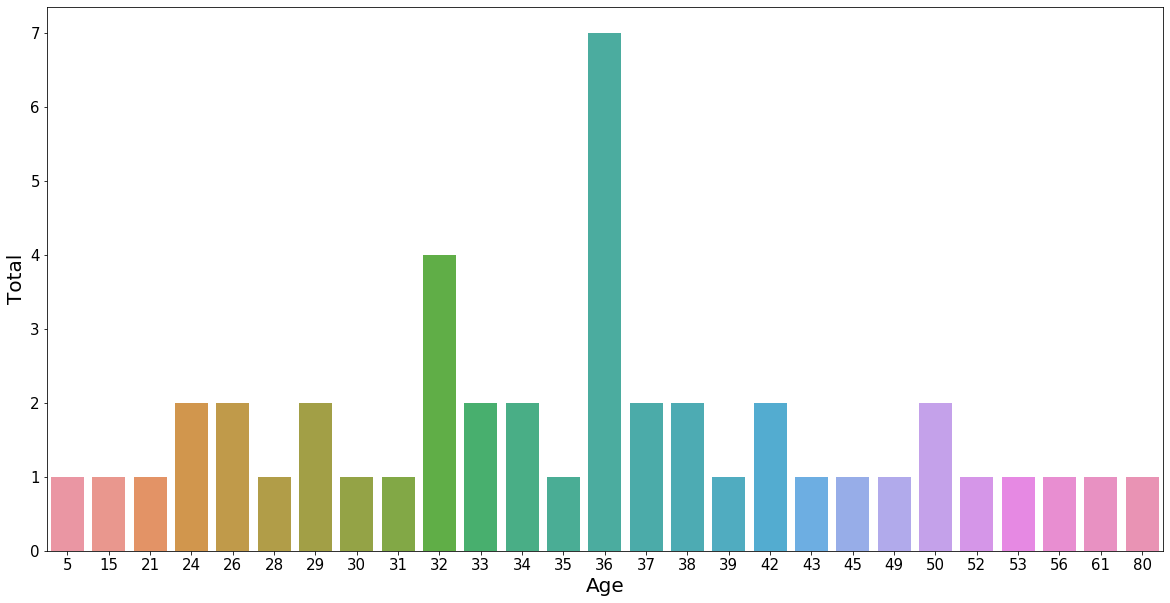

In [5]:
plt.figure(figsize=(20,10))
b=sns.countplot(df['age_event'])
b.set_xlabel("Age",fontsize=20)
b.set_ylabel("Total",fontsize=20)
b.tick_params(labelsize=15)
plt.xticks(rotation=0)
plt.show()

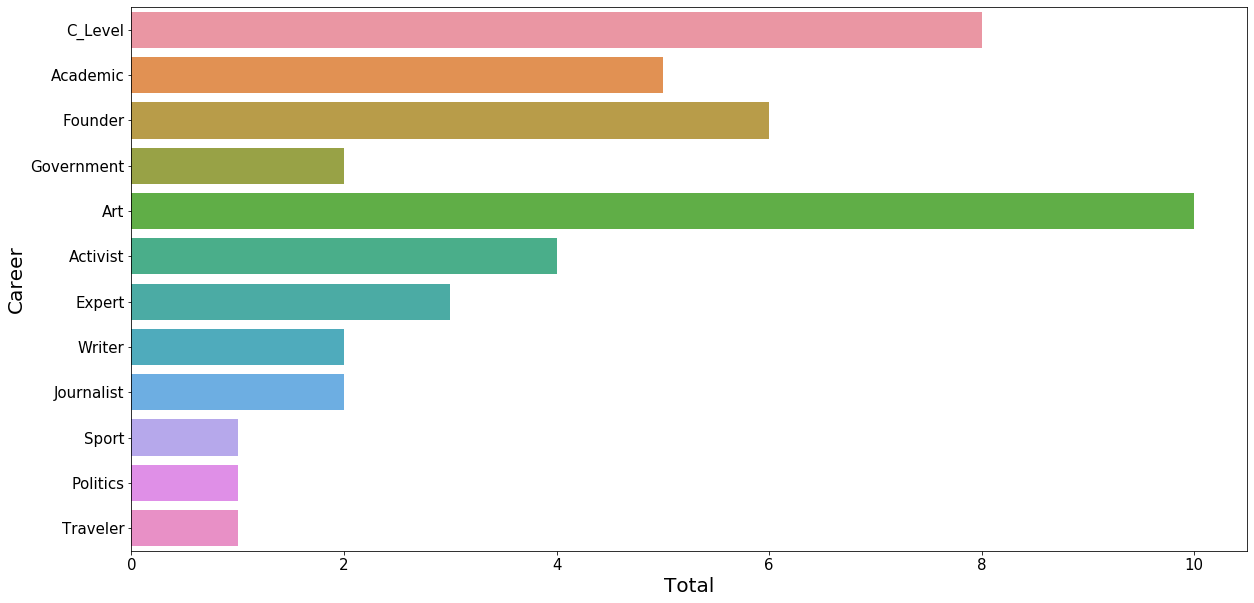

In [6]:
plt.figure(figsize=(20,10))
b=sns.countplot(y=df['Career_Group'])
b.set_xlabel("Total",fontsize=20)
b.set_ylabel("Career",fontsize=20)
b.tick_params(labelsize=15)
plt.xticks(rotation=0)
plt.show()

In [7]:
df['Gender'] = df['Gender'].replace('m', 'Male')
df['Gender'] = df['Gender'].replace('f', 'Female')

In [8]:
df.head()

,speaker_name,age_event,Career_Group,Gender,daerah_asal,follower,following,total_mention,total_retweet,total_tweet,replies_count,likes_count,views,likes,topic_spread,total_reach
0,Adi Panuntun,32,C_Level,Male,Bandung,2145,807,634,91,207,0,5,19252,77,20,19349
1,Chandra Tresnadi,32,Academic,Male,Bandung,501,520,0,46,1748,0,2,7111,12,19,7142
2,Rene Suhardono,38,Founder,Male,Jakarta,219786,2014,39576,4380,15721,3,2353,116135,1312,361,117808
3,Betti Alisjahbana,50,C_Level,Female,Bandung,6525,331,1736,886,1548,0,501,18935,101,22,19058
4,Anies Baswedan,42,Government,Male,Kuningan,832090,707,117,0,0,0,0,240899,2704,395,243998


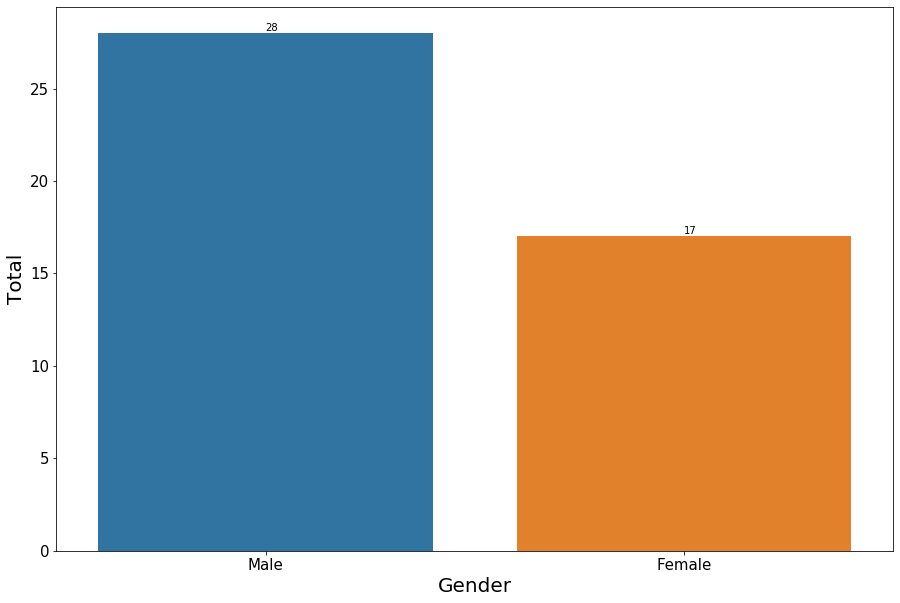

In [9]:
plt.figure(figsize=(15,10))
fig=sns.countplot(df['Gender'])
fig.set_xlabel("Gender",fontsize=20)
fig.set_ylabel("Total",fontsize=20)
fig.tick_params(labelsize=15)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 0),  # use 3 points offset
                 textcoords="offset points",  # in both directions
                 va='bottom')
plt.show()

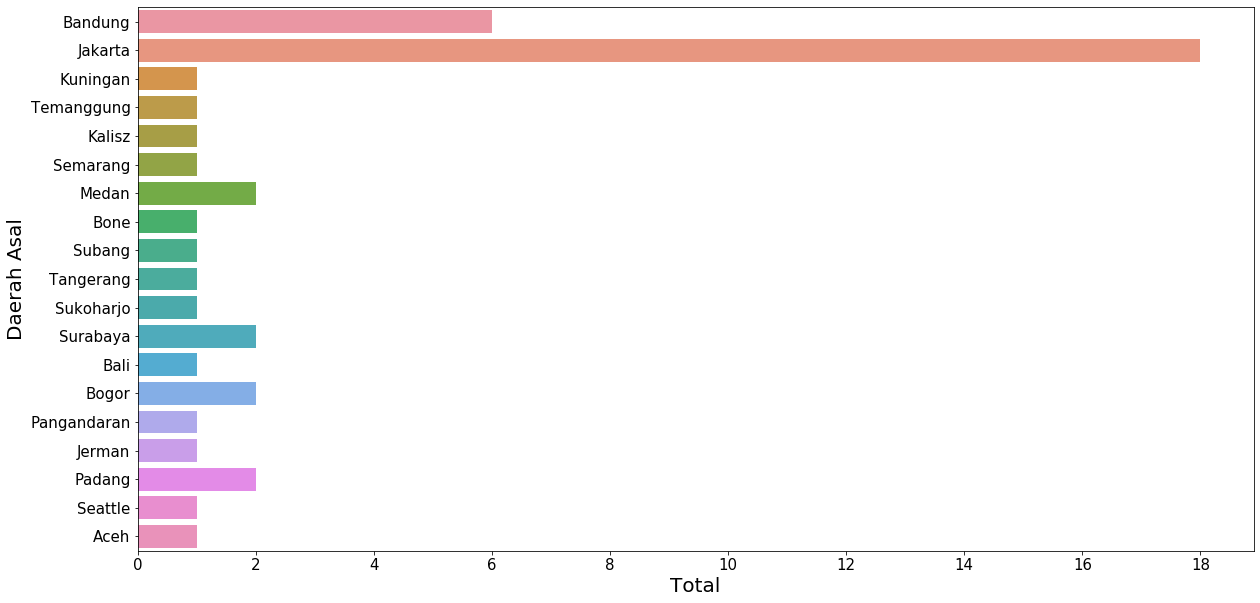

In [10]:
plt.figure(figsize=(20,10))
b=sns.countplot(y=df['daerah_asal'])
b.set_xlabel("Total",fontsize=20)
b.set_ylabel("Daerah Asal",fontsize=20)
b.tick_params(labelsize=15)
plt.xticks(range(0,20,2), rotation=0)
plt.show()

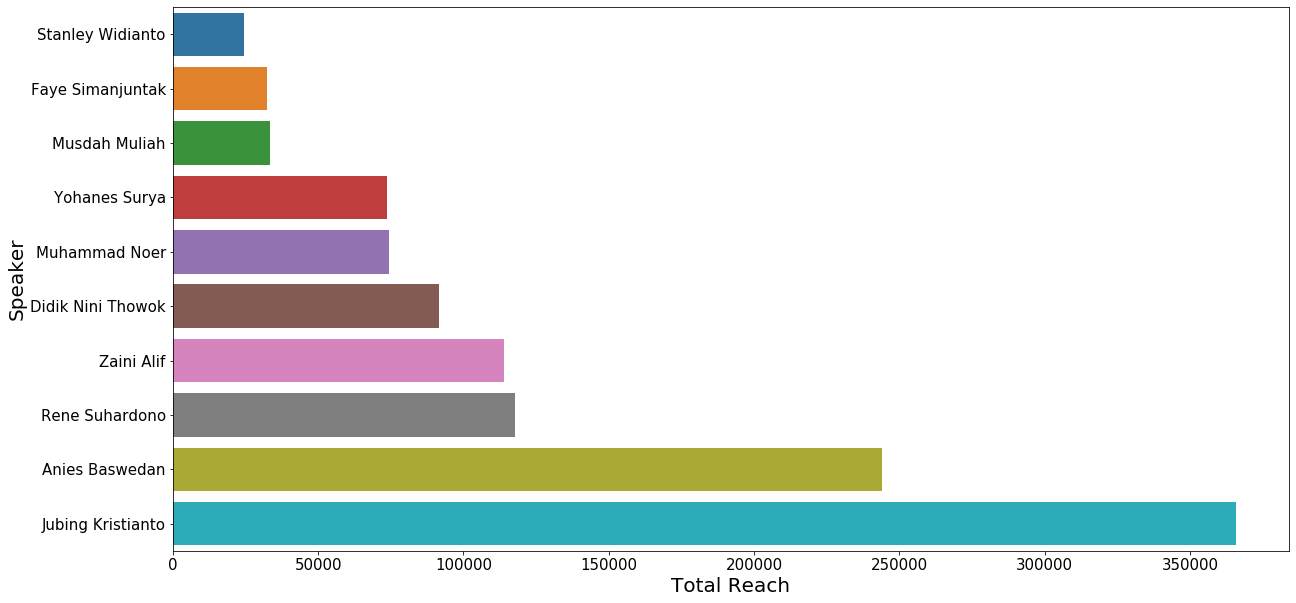

In [11]:
plt.figure(figsize=(20,10))
b=sns.barplot(x='total_reach', y='speaker_name', data=df.sort_values(by=['total_reach']).tail(10))
b.set_xlabel("Total Reach",fontsize=20)
b.set_ylabel("Speaker",fontsize=20)
b.tick_params(labelsize=15)
plt.xticks(rotation=0)
plt.show()

In [12]:
df.sort_values(by=['total_reach'], ascending=False).head()

,speaker_name,age_event,Career_Group,Gender,daerah_asal,follower,following,total_mention,total_retweet,total_tweet,replies_count,likes_count,views,likes,topic_spread,total_reach
7,Jubing Kristianto,45,Art,Male,Semarang,9039,60,524,221,392,79,51,363123,2394,220,365737
4,Anies Baswedan,42,Government,Male,Kuningan,832090,707,117,0,0,0,0,240899,2704,395,243998
2,Rene Suhardono,38,Founder,Male,Jakarta,219786,2014,39576,4380,15721,3,2353,116135,1312,361,117808
10,Zaini Alif,36,Academic,Male,Subang,885,119,74,0,5,1,0,111747,2003,335,114085
5,Didik Nini Thowok,56,Art,Male,Temanggung,21,296,0,0,0,0,0,90388,1246,123,91757


# Feature Engineering

In [13]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [14]:
data = df.drop(['speaker_name','views','likes','topic_spread','daerah_asal','following','total_tweet','age_event'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
Career_Group     45 non-null object
Gender           45 non-null object
follower         45 non-null int64
total_mention    45 non-null int64
total_retweet    45 non-null int64
replies_count    45 non-null int64
likes_count      45 non-null int64
total_reach      45 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.9+ KB


In [15]:
data.head()

,Career_Group,Gender,follower,total_mention,total_retweet,replies_count,likes_count,total_reach
0,C_Level,Male,2145,634,91,0,5,19349
1,Academic,Male,501,0,46,0,2,7142
2,Founder,Male,219786,39576,4380,3,2353,117808
3,C_Level,Female,6525,1736,886,0,501,19058
4,Government,Male,832090,117,0,0,0,243998


In [16]:
scale = MinMaxScaler()

In [17]:
#data[['follower']] = scale.fit_transform(data[['follower']])
#data[['total_mention']] = scale.fit_transform(data[['total_mention']])
#data[['total_retweet']] = scale.fit_transform(data[['total_retweet']])
#data[['replies_count']] = scale.fit_transform(data[['replies_count']])
#data[['likes_count']] = scale.fit_transform(data[['likes_count']])
#data[['total_reach']] = scale.fit_transform(data[['total_reach']])

In [18]:
lbl = LabelEncoder()
data['Career_Group'] = lbl.fit_transform(data['Career_Group'])
data['Gender'] = lbl.fit_transform(data['Gender'])

In [19]:
data.head()

,Career_Group,Gender,follower,total_mention,total_retweet,replies_count,likes_count,total_reach
0,3,1,2145,634,91,0,5,19349
1,0,1,501,0,46,0,2,7142
2,5,1,219786,39576,4380,3,2353,117808
3,3,0,6525,1736,886,0,501,19058
4,6,1,832090,117,0,0,0,243998


In [20]:
data.iloc[8]

Career_Group         5
Gender               1
follower           524
total_mention      166
total_retweet       18
replies_count        5
likes_count          7
total_reach      74435
Name: 8, dtype: int64

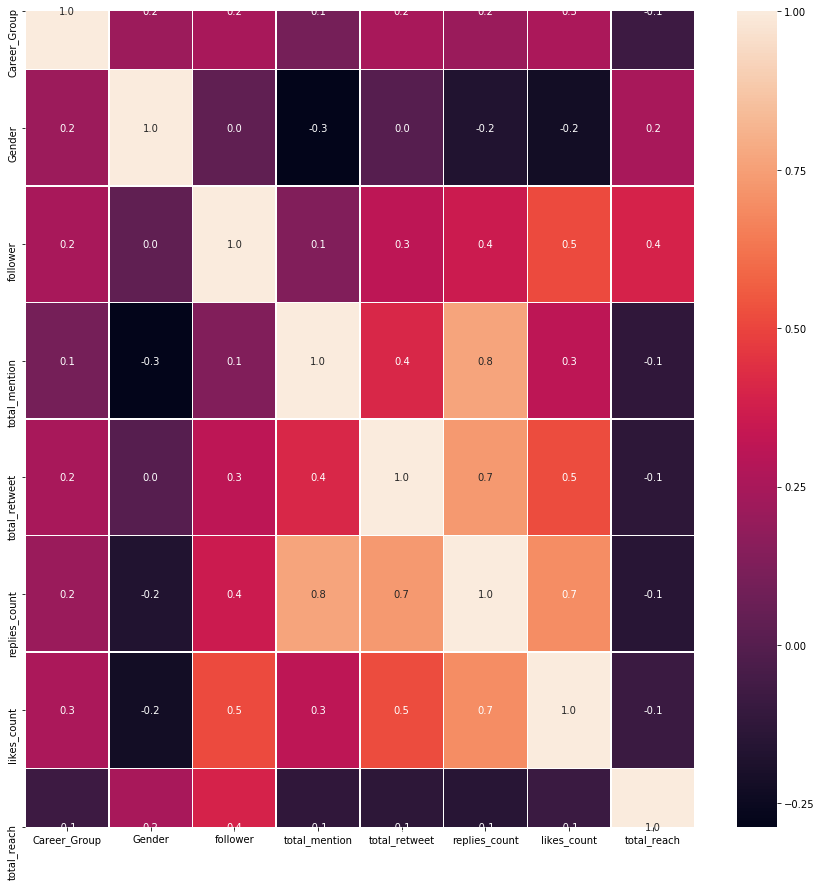

In [21]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True,linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

# Feature Importance

In [22]:
X = data.drop(['total_reach','total_mention','replies_count'], axis=1)
y = data['total_reach']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [24]:
model = LinearRegression()

In [25]:
model.__init__(normalize=True)

In [26]:
#lr = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
importance = model.coef_

In [28]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -4180.17683
Feature: 1, Score: 30614.70768
Feature: 2, Score: 0.26620
Feature: 3, Score: -0.43837
Feature: 4, Score: -0.80094


In [29]:
data.columns[2]

'follower'

In [30]:
data.columns

Index(['Career_Group', 'Gender', 'follower', 'total_mention', 'total_retweet',
       'replies_count', 'likes_count', 'total_reach'],
      dtype='object')

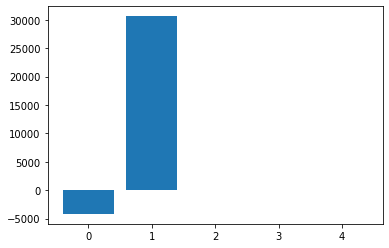

In [31]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Modelling

In [32]:
from sklearn.metrics import r2_score

In [33]:
# pip install xgboost
import xgboost as xgb


In [229]:
import xgboost as xgboost
from sklearn.model_selection import GridSearchCV

#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8,1],
    'gamma':[0],
    'min_child_weight':[1.5,6,0.5],
    'learning_rate':[0.01,1,0.01],
    'max_depth':[2,5,1],
    'n_estimators':[1,100,10],
    #'reg_alpha':[1e-5, 1e-2,  0.75],
    #'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]
}

                    
xgb_model = xgboost.XGBRegressor(booster='gblinear')

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=-1,iid=False,cv=4, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)


Fitting 4 folds for each of 648 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1964s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 223 tas

[12:44:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_...
                                    validate_parameters=None, verbosity=None),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1], 'gamma': [0],
                         'learning_rate': [0.01, 1, 0.01],
                         'max_depth': [2

In [230]:
#print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1.5, 'n_estimators': 100, 'subsample': 0.6}
best score
-4488299829.134717


In [221]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=1000,
    reg_alpha=1,
    reg_lambda=1,
    gamma=0,
    learning_rate=0.1,
    max_depth=2,
    subsample=0.9,
    colsample_bytree=1,
    min_child_weight=1,
    objective='reg:linear',
    booster='gblinear'
)

In [222]:
xgb_reg.fit(X_train, y_train)

[12:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method=None,
             validate_parameters=1, verbosity=None)

In [223]:
y_pred = xgb_reg.predict(X_test)

In [224]:
xgb_reg.score(X_train, y_train)

0.1250036835614904

In [225]:
xgb_reg.score(X_test, y_test)

-0.3711108064878681

In [209]:
importance = xgb_reg.feature_importances_

In [210]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.09703
Feature: 1, Score: 0.40175
Feature: 2, Score: 0.19690
Feature: 3, Score: 0.22485
Feature: 4, Score: 0.07946


In [184]:
data.columns

Index(['Career_Group', 'Gender', 'follower', 'total_mention', 'total_retweet',
       'replies_count', 'likes_count', 'total_reach'],
      dtype='object')

In [185]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_result = df_result.head(25)

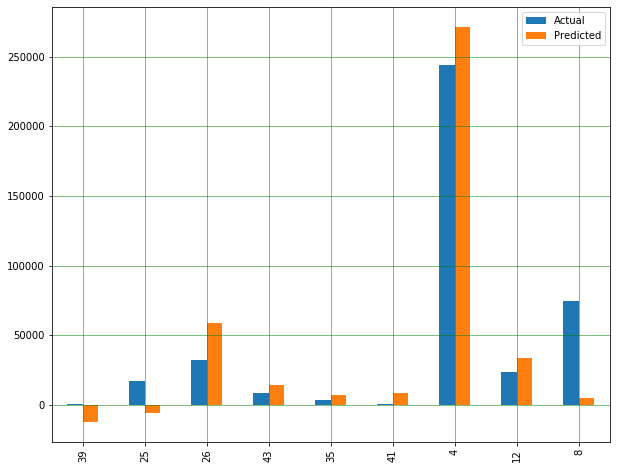

In [186]:
df_result.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [187]:
r2_score(y_test, y_pred)

0.8525189821169252

In [188]:
eval_set = [(X_test, y_test)]
xgb_reg.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[12:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-error:-44960.00000
[1]	validation_0-error:-44960.00000
[2]	validation_0-error:-44960.00000
[3]	validation_0-error:-44960.00000
[4]	validation_0-error:-44960.00000
[5]	validation_0-error:-44960.00000
[6]	validation_0-error:-44960.00000
[7]	validation_0-error:-44960.00000
[8]	validation_0-error:-44960.00000
[9]	validation_0-error:-44960.00000
[10]	validation_0-error:-44960.00000
[11]	validation_0-error:-44960.00000
[12]	validation_0-error:-44960.00000
[13]	validation_0-error:-44960.00000
[14]	validation_0-error:-44960.00000
[15]	validation_0-error:-44960.00000
[16]	validation_0-error:-44960.00000
[17]	validation_0-error:-44960.00000
[18]	validation_0-error:-44960.00000
[19]	validation_0-error:-44960.00000
[20]	validation_0-error:-44960.00000
[21]	validation_0-error:-44960.00000
[22]	validation_0-e

[214]	validation_0-error:-44818.77734
[215]	validation_0-error:-44818.77734
[216]	validation_0-error:-44818.77734
[217]	validation_0-error:-44818.77734
[218]	validation_0-error:-44818.77734
[219]	validation_0-error:-44818.77734
[220]	validation_0-error:-44818.77734
[221]	validation_0-error:-44818.77734
[222]	validation_0-error:-44818.77734
[223]	validation_0-error:-44818.77734
[224]	validation_0-error:-44818.77734
[225]	validation_0-error:-44818.77734
[226]	validation_0-error:-44818.77734
[227]	validation_0-error:-44818.77734
[228]	validation_0-error:-41071.10938
[229]	validation_0-error:-44818.77734
[230]	validation_0-error:-41071.10938
[231]	validation_0-error:-41071.10938
[232]	validation_0-error:-41071.10938
[233]	validation_0-error:-44818.77734
[234]	validation_0-error:-44818.77734
[235]	validation_0-error:-44818.77734
[236]	validation_0-error:-44818.77734
[237]	validation_0-error:-44818.77734
[238]	validation_0-error:-44818.77734
[239]	validation_0-error:-44818.77734
[240]	valida

[430]	validation_0-error:-41071.10938
[431]	validation_0-error:-41071.10938
[432]	validation_0-error:-41071.10938
[433]	validation_0-error:-41071.10938
[434]	validation_0-error:-41071.10938
[435]	validation_0-error:-41071.10938
[436]	validation_0-error:-41071.10938
[437]	validation_0-error:-41071.10938
[438]	validation_0-error:-41071.10938
[439]	validation_0-error:-41071.10938
[440]	validation_0-error:-41071.10938
[441]	validation_0-error:-41071.10938
[442]	validation_0-error:-41071.10938
[443]	validation_0-error:-41071.10938
[444]	validation_0-error:-41071.10938
[445]	validation_0-error:-41071.10938
[446]	validation_0-error:-41071.10938
[447]	validation_0-error:-41071.10938
[448]	validation_0-error:-41071.10938
[449]	validation_0-error:-41071.10938
[450]	validation_0-error:-41071.10938
[451]	validation_0-error:-41071.10938
[452]	validation_0-error:-41071.10938
[453]	validation_0-error:-41071.10938
[454]	validation_0-error:-41071.10938
[455]	validation_0-error:-41071.10938
[456]	valida

[646]	validation_0-error:-41071.10938
[647]	validation_0-error:-41071.10938
[648]	validation_0-error:-41071.10938
[649]	validation_0-error:-41071.10938
[650]	validation_0-error:-41071.10938
[651]	validation_0-error:-41071.10938
[652]	validation_0-error:-41071.10938
[653]	validation_0-error:-41071.10938
[654]	validation_0-error:-41071.10938
[655]	validation_0-error:-41071.10938
[656]	validation_0-error:-41071.10938
[657]	validation_0-error:-41071.10938
[658]	validation_0-error:-41071.10938
[659]	validation_0-error:-41071.10938
[660]	validation_0-error:-41071.10938
[661]	validation_0-error:-41071.10938
[662]	validation_0-error:-41071.10938
[663]	validation_0-error:-41071.10938
[664]	validation_0-error:-41071.10938
[665]	validation_0-error:-41071.10938
[666]	validation_0-error:-41071.10938
[667]	validation_0-error:-41071.10938
[668]	validation_0-error:-41071.10938
[669]	validation_0-error:-41071.10938
[670]	validation_0-error:-41071.10938
[671]	validation_0-error:-41071.10938
[672]	valida

[862]	validation_0-error:-41071.10938
[863]	validation_0-error:-41071.10938
[864]	validation_0-error:-41071.10938
[865]	validation_0-error:-41071.10938
[866]	validation_0-error:-41071.10938
[867]	validation_0-error:-41071.10938
[868]	validation_0-error:-41071.10938
[869]	validation_0-error:-41071.10938
[870]	validation_0-error:-41071.10938
[871]	validation_0-error:-41071.10938
[872]	validation_0-error:-41071.10938
[873]	validation_0-error:-41071.10938
[874]	validation_0-error:-41071.10938
[875]	validation_0-error:-41071.10938
[876]	validation_0-error:-41071.10938
[877]	validation_0-error:-41071.10938
[878]	validation_0-error:-41071.10938
[879]	validation_0-error:-41071.10938
[880]	validation_0-error:-41071.10938
[881]	validation_0-error:-41071.10938
[882]	validation_0-error:-41071.10938
[883]	validation_0-error:-41071.10938
[884]	validation_0-error:-41071.10938
[885]	validation_0-error:-41071.10938
[886]	validation_0-error:-41071.10938
[887]	validation_0-error:-41071.10938
[888]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [189]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [190]:
from sklearn.metrics import mean_squared_error

In [191]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 28292.890875


In [ ]:
import joblib

In [ ]:
# C-square test
# https://web.csulb.edu/~msaintg/ppa696/696stsig.html